In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

- Each column of $\tilde{X}$ represents a feature.
- Each row of $\tilde{X}$ represents an individual.
- We have ones in $\tilde{X}$ to include $w_0$ in the features.
- If we have heights and weights of 3 people:
  - The size of $y$ would be (3, 1).
  - The size of $\tilde{X}$ would be (3, 2).
  - $\tilde{X}_{32}$ represents the height of the individual 3.

Let $e = y - \tilde{X}w$. **MSE**:
$$
\mathcal{L}(w) = \frac{1}{2N}\sum_{n=1}^N \left(y_n-x_n^Tw\right)^2 = \frac{1}{2N}e^Te
$$

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w, mae=False):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    e = y - (tx @ w)
    if mae:
        return np.mean(np.abs(e))
    n = len(y)
    return (e @ e) / (2 * n)


w = np.array([1, 2])
compute_loss(y, tx, w)

2694.483365887085

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    nrows, ncols = len(w0), len(w1)
    losses = np.zeros((nrows, ncols))
    for i in range(nrows):
        for j in range(ncols):
            w = np.array([w0[i], w1[j]])
            losses[i, j] = compute_loss(y, tx, w)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.424483146782485, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.018 seconds


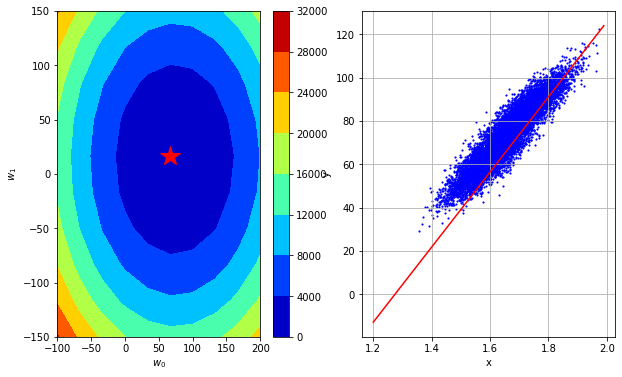

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

num_intervals = 10
# num_intervals = 50

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=num_intervals)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
# fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    n = len(y)
    e = y - (tx @ w)
    return -(tx.T @ e) / n


w = np.array([1, 2])
compute_gradient(y, tx, w)

array([-72.293922  , -11.47971243])

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.236712759168, w0=51.30574540147361, w1=9.435798704492269
Gradient Descent(1/49): loss=265.3024621089606, w0=66.69746902191571, w1=12.266538315839997
Gradient Descent(2/49): loss=37.87837955044127, w0=71.31498610804834, w1=13.115760199244328
Gradient Descent(3/49): loss=17.410212120174478, w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/49): loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/49): loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/49): loss=15.386020684743528, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638301, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.3858879656522, w0=73.29379216412119, w1=13.479

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

- The algorithm converges fastly.
- The final values of $w_0$ and $w_1$ found are optimal.
- The procedure converges for $\gamma < 1$ and diverges for $\gamma \geq 1$.
- The procedure converges for $\gamma = (0, 0)$, $(100, 10)$ and $(-1000, 1000)$.

So, the gradient descent converges to the optimum when the value of the step
size is chosen appropriately.

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """
    Compute a stochastic gradient from just few examples n
    and their corresponding y_n labels.
    """
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w)
            loss = compute_loss(y, tx, w)
            w = w - gamma * grad

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2792.236712759168, w0=55.657755266995274, w1=28.4396545823516
Stochastic Gradient Descent(1/49): loss=282.8030109493458, w0=54.97725167526785, w1=27.52426996311601
Stochastic Gradient Descent(2/49): loss=281.76089188028527, w0=90.20078139138485, w1=-26.02620586366663
Stochastic Gradient Descent(3/49): loss=938.6656253832961, w0=91.85438466927243, w1=-25.169926940447517
Stochastic Gradient Descent(4/49): loss=934.5285870041333, w0=107.77306827218844, w1=-11.641551984501278
Stochastic Gradient Descent(5/49): loss=925.3306146427037, w0=69.74840038374349, w1=7.919267922242652
Stochastic Gradient Descent(6/49): loss=37.13052123163025, w0=72.80678740776065, w1=7.836006514346118
Stochastic Gradient Descent(7/49): loss=31.43024618468304, w0=70.2241173283425, w1=10.59797482918917
Stochastic Gradient Descent(8/49): loss=24.249944050697625, w0=78.90372174911927, w1=24.133845667427025
Stochastic Gradient Descent(9/49): loss=87.8760919368986, w0=80.9002525387

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


Text(0.5, 1.0, 'Data with outliers')

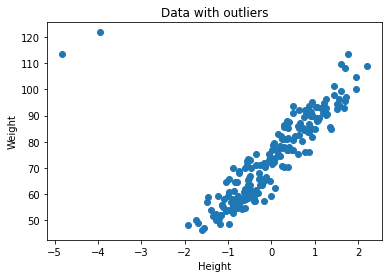

In [14]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
plt.scatter(x, y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Data with outliers')

Grid Search: loss*=109.17758755205352, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.000 seconds


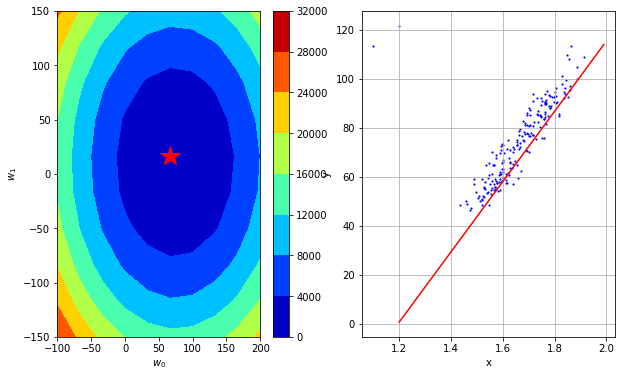

In [15]:
num_intervals = 10
# num_intervals = 50

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=num_intervals)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [16]:
w = np.array([1, 2])
compute_loss(y, tx, w, mae=True)

73.06780585492638

In [17]:
def compute_subgradient(y, tx, w):
    """Compute the subgradient."""
    n = len(y)
    e = y - (tx @ w)
    return -(tx.T @ np.sign(e)) / n

compute_subgradient(y, tx, w)

array([-1.00000000e+00, -1.25092456e-15])

In [18]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Subgradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_subgradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Subgradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [19]:
# Define the parameters of the algorithm.
max_iters = 100
gamma = 1

# Initialization
w_initial = np.array([0, 0])

# Start subgradient descent.
start_time = datetime.datetime.now()
subgradient_losses, subgradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Subgradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Subgradient Descent(0/99): loss=2869.8351145358533, w0=1.0, w1=1.2509245564588397e-15
Subgradient Descent(1/99): loss=2796.2673086809273, w0=2.0, w1=2.5018491129176793e-15
Subgradient Descent(2/99): loss=2723.699502826, w0=3.0, w1=3.752773669376519e-15
Subgradient Descent(3/99): loss=2652.131696971074, w0=4.0, w1=5.003698225835359e-15
Subgradient Descent(4/99): loss=2581.5638911161477, w0=5.0, w1=6.2546227822941986e-15
Subgradient Descent(5/99): loss=2511.9960852612207, w0=6.0, w1=7.505547338753038e-15
Subgradient Descent(6/99): loss=2443.4282794062947, w0=7.0, w1=8.756471895211878e-15
Subgradient Descent(7/99): loss=2375.8604735513677, w0=8.0, w1=1.0007396451670717e-14
Subgradient Descent(8/99): loss=2309.292667696442, w0=9.0, w1=1.1258321008129557e-14
Subgradient Descent(9/99): loss=2243.724861841515, w0=10.0, w1=1.2509245564588397e-14
Subgradient Descent(10/99): loss=2179.1570559865886, w0=11.0, w1=1.3760170121047237e-14
Subgradient Descent(11/99): loss=2115.5892501316625, w0=12.0, 

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgradient_losses, subgradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=101, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>